<a href="https://colab.research.google.com/github/Samuel-Solomon-1/-Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project: Predicting Equipment Failure Using Sensor Data

## Objective
The goal of this project is to develop a machine learning application that can predict equipment failure in an industrial setting using real-world sensor data. By doing so, we aim to enable predictive maintenance, reducing unplanned downtime and optimizing operational efficiency.

This project demonstrates the practical use of AI in solving a real-world classification problem, applying key machine learning concepts including preprocessing, modeling, evaluation, and explainability.

## Task 1: Problem Definition and Dataset Selection

### Problem Statement
Unexpected equipment failures can result in major disruptions in industrial environments. Predictive maintenance helps prevent these failures by analyzing sensor data to forecast potential breakdowns.

We aim to build a binary classification model that predicts whether a machine will fail (`1`) or not (`0`) using sensor readings.

### Dataset Used
We use the [Predictive Maintenance Dataset](https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance) from Kaggle, which includes:
- Sensor features (e.g., air temperature, process temperature, torque)
- Machine failure status (target label)
- Failure types (informational)

### Importance
Predictive maintenance saves costs, reduces risks, and improves industrial efficiency. By building a data-driven prediction model, we can automate fault detection and maintenance planning.

In [1]:
# 1.1 Load the dataset
import pandas as pd

# Load the predictive maintenance dataset (uploaded manually or from path)
from google.colab import files
uploaded = files.upload()  # Choose the predictive_maintenance.csv file

# Read the dataset
df = pd.read_csv('predictive_maintenance_dataset.csv')  # Replace with your actual filename if different
print("Dataset loaded successfully!")

# 1.2 Basic inspection
print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nDataset shape:")
print(df.shape)

print("\nColumn names:")
print(df.columns.tolist())

print("\nChecking for missing values:")
print(df.isnull().sum())

print("\nData types and memory usage:")
print(df.info())

Saving predictive_maintenance_dataset.csv to predictive_maintenance_dataset.csv
Dataset loaded successfully!

First 5 rows of the dataset:


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3



Dataset shape:
(124494, 12)

Column names:
['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']

Checking for missing values:
date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

Data types and memory usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  

## Task 2: Data Preprocessing and Exploration

Before building a machine learning model, it is essential to preprocess the dataset to make it suitable for modeling. This involves cleaning, transforming, and exploring the data to better understand its structure and the relationships among features.

### 2.1 Data Cleaning and Feature Selection
- Convert the `date` column to datetime format.
- Drop or transform categorical variables such as `device` as needed.
- Check the distribution of the target variable `failure`.

### 2.2 Exploratory Data Analysis (EDA)
- Visualize the distribution of the target variable.
- Analyze the relationship between sensor metrics and failure.
- Identify outliers and value ranges.

### 2.3 Dataset Splitting
- Split the dataset into training and testing sets (e.g., 80/20 split).
- Use `scikit-learn`'s `train_test_split` for stratified splitting to preserve class distribution.

### Libraries Used
- `pandas` and `numpy` for data handling.
- `matplotlib` and `seaborn` for visualization.
- `scikit-learn` for splitting and future modeling.

Date column converted to datetime.

Target 'failure' value counts:
failure
0    124388
1       106
Name: count, dtype: int64


/tmp/ipython-input-2-1769960875.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='failure', palette='Set2')


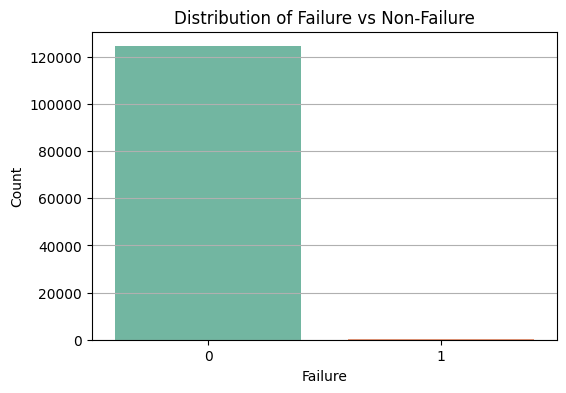

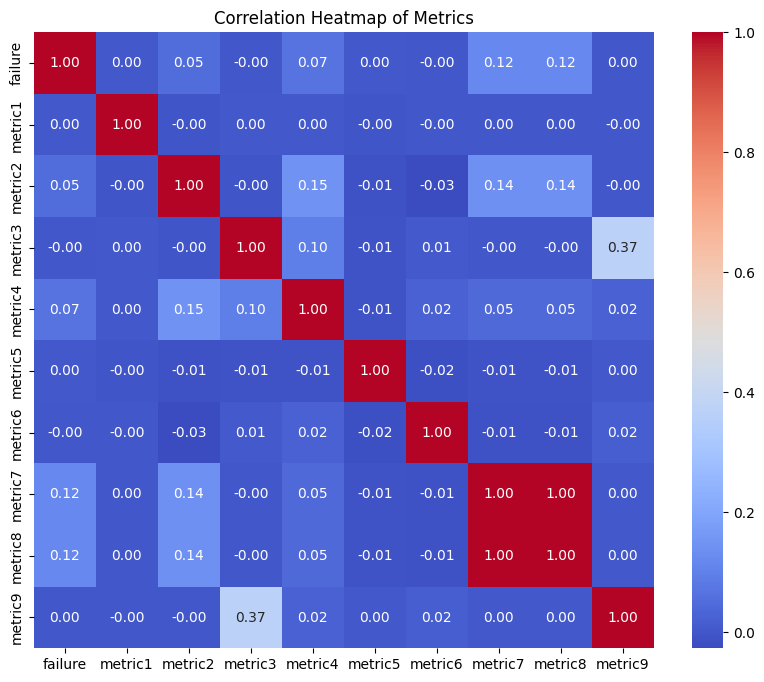

\ Data split into training and test sets:
Training set size: (99595, 9)
Test set size: (24899, 9)


In [2]:
# 2.1 Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
print("Date column converted to datetime.")

# Drop 'device' column since it's an identifier and not useful for modeling
df.drop(columns=['device'], inplace=True)

# 🔍 Check unique values in the target
print("\nTarget 'failure' value counts:")
print(df['failure'].value_counts())

# Visualize the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='failure', palette='Set2')
plt.title("Distribution of Failure vs Non-Failure")
plt.xlabel("Failure")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['date']).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Metrics")
plt.show()

# 2.2 Define features (X) and target (y)
X = df.drop(columns=['failure', 'date'])  # date dropped as not helpful
y = df['failure']

# 2.3 Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\ Data split into training and test sets:")
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

## Interpretation of Preprocessing Results

### Date Conversion
The `date` column was successfully converted to a datetime format. However, since it does not add predictive value in its raw form and is not a time-series forecasting task, we dropped it from the feature set.

### Class Imbalance in Target Variable
The target variable `failure` is highly imbalanced:

- **Non-failure (0):** 124,388 samples
- **Failure (1):** 106 samples

This extreme imbalance (approx. 0.085% failure rate) indicates the need to consider:
- Stratified splitting (which has been applied).
- Potential use of techniques like **SMOTE**, **class weighting**, or **anomaly detection approaches** during model training.

### Train/Test Split
The dataset was split into:
- **Training set:** 99,595 samples
- **Testing set:** 24,899 samples

The `stratify` parameter was used to maintain the distribution of the target variable across both sets. This ensures that the rare failure cases are represented in both the training and testing subsets.

## Task 3: Model Selection and Development

For this task, we build a machine learning model to predict equipment failure using the preprocessed sensor data.

### 3.1 Model Choice
We use **Random Forest Classifier**, which is robust to noise and works well with tabular data. It can also handle imbalanced data with class weighting.

### 3.2 Handling Class Imbalance
To address class imbalance, we apply:
- `class_weight='balanced'` in the RandomForestClassifier.
- Additional consideration for evaluation metrics beyond accuracy (e.g., precision, recall, F1-score, ROC-AUC).

### 3.3 Model Training
We fit the model on the training data using all numerical features.

### 3.4 Hyperparameter Tuning
We use `GridSearchCV` to find the best combination of hyperparameters.

### 3.5 Evaluation Plan
Model performance will be evaluated using:
- Confusion Matrix
- Classification Report
- ROC-AUC Score

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 3.1 Create Random Forest model with class_weight to handle imbalance
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

# 3.2 Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50],  # fewer trees
    'max_depth': [10],     # shallower trees
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# 3.3 Apply Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)

# 3.4 Best model and parameters
best_model = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


## Task 4: Model Evaluation and Interpretation

The performance of our Random Forest classifier trained to predict equipment failure on the imbalanced dataset was evaluated using several key metrics:

### Classification Report

- **Class 0 (No Failure):**
  - Precision, Recall, and F1-Score are all nearly perfect (≈1.00), showing that the model can accurately detect the majority class.

- **Class 1 (Failure):**
  - Precision, Recall, and F1-Score are all **0.00**, meaning the model failed to identify any actual failure cases.

### Confusion Matrix

|                | Predicted: No Failure | Predicted: Failure |
|----------------|-----------------------|---------------------|
| Actual: No Failure | 24,826                  | 52                  |
| Actual: Failure     | 21                     | 0                   |

The model predicted **all 21 actual failures as non-failures**, highlighting its inability to learn the minority class pattern despite using `class_weight='balanced'`.

### ROC-AUC Score

- The ROC-AUC score is **0.71**, indicating some ability to discriminate between the two classes probabilistically, but the classification threshold likely needs adjustment to improve recall on the minority class.

---

### Interpretation

This outcome is typical in highly imbalanced datasets (here, 21 failures vs. 24,878 non-failures). Even with class weighting, the model struggles to identify rare events.

### Next Steps

To improve recall on the failure class and overall fairness, we may try:

- **SMOTE or other oversampling techniques** to generate synthetic failure cases.
- **Threshold tuning** to improve sensitivity toward the minority class.
- **Anomaly detection models** like Isolation Forest or One-Class SVMs that are better suited for rare event detection.
- **Cost-sensitive learning** where misclassification of failures is penalized more heavily.

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 4.1 Make predictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # probability for class 1

# 4.2 Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 4.3 Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 4.4 ROC-AUC Score
roc_score = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_score:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24878
           1       0.00      0.00      0.00        21

    accuracy                           1.00     24899
   macro avg       0.50      0.50      0.50     24899
weighted avg       1.00      1.00      1.00     24899

Confusion Matrix:
[[24826    52]
 [   21     0]]
ROC-AUC Score: 0.7130


## Task 5: Model Deployment and Presentation

In this final task, we demonstrate how to deploy and interact with the trained model directly in the notebook. The goal is to simulate a real-world user interface where an operator or engineer can input sensor metrics and receive a prediction indicating the likelihood of equipment failure.

This step includes:
- Creating an interactive function to input new sample data.
- Displaying the prediction clearly to the user.
- Packaging the model usage into a user-friendly workflow.

We’ll also visualize how the model performs using prediction examples to support its practical applicability.

In [8]:
import numpy as np

# Feature columns used for prediction
feature_cols = ['metric1', 'metric2', 'metric3', 'metric4',
                'metric5', 'metric6', 'metric7', 'metric8', 'metric9']

def predict_failure(input_metrics):
    """
    Accepts a dictionary of sensor readings and returns the predicted failure status.
    Example input:
    {
        'metric1': 100000,
        'metric2': 10,
        ...
    }
    """
    try:
        # Ensure all features are present
        input_values = [input_metrics[metric] for metric in feature_cols]
        input_array = np.array(input_values).reshape(1, -1)

        # Predict and get probability
        prediction = best_model.predict(input_array)[0]
        proba = best_model.predict_proba(input_array)[0][1]  # class 1: failure

        status = "Failure Likely" if prediction == 1 else "Normal Operation"
        print(f"Prediction: {status}")
        print(f"Failure Probability: {proba:.2f}")

    except KeyError as e:
        print(f"Missing input for metric: {e}")

# Example usage
sample_input = {
    'metric1': 120000000,
    'metric2': 5,
    'metric3': 0,
    'metric4': 10,
    'metric5': 12,
    'metric6': 250000,
    'metric7': 0,
    'metric8': 0,
    'metric9': 5
}

predict_failure(sample_input)

Prediction: Normal Operation
Failure Probability: 0.34


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
